# **EDA PROJECT 1: IEEE-CIS Fraud Detection**

## About the Project: IEEE-CIS Fraud Detection EDA

This project undertakes an Exploratory Data Analysis (EDA) of the IEEE-CIS Fraud Detection dataset. The primary objective is to gain a deep understanding of the dataset's structure, characteristics, and potential challenges before proceeding with feature engineering and model building. Through this EDA, I aim to identify patterns, anomalies, and relationships within the transaction data that can inform the development of a robust fraud detection model. Key areas of focus include examining data distributions, identifying missing values, understanding the nature of categorical features, and exploring the class imbalance inherent in fraud datasets.

In [1]:
# Importing Libraries
import pandas as pd     # For working with csv files
import numpy as np      # For array related operations
import matplotlib.pyplot as plt  # For data visualization

In [2]:
# Loading Data
fruad_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/fraud_data.csv")

# **Data Analysis Techniques**

**Initial Review of Data**

In [3]:
# Explore the first 5 records
fruad_data.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2994681        0         242834          25.000         H   9803   
1        3557242        0       15123000         117.000         W   7919   
2        3327470        0        8378575          73.773         C  12778   
3        3118781        0        2607840         400.000         R  12316   
4        3459772        0       12226544          31.950         W   9002   

   card2  card3       card4  card5  ...                  id_31  id_32  \
0  583.0  150.0        visa  226.0  ...           firefox 56.0   24.0   
1  194.0  150.0  mastercard  166.0  ...                    NaN    NaN   
2  500.0  185.0  mastercard  224.0  ...                    NaN    NaN   
3  548.0  150.0        visa  195.0  ...  mobile safari generic   32.0   
4  453.0  150.0        visa  226.0  ...                    NaN    NaN   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  DeviceInfo  
0  1920x1080  match_status:2      T     F     T      T     desktop     rv:56.0  
1        NaN             NaN    NaN   NaN   NaN    NaN         NaN         NaN  
2        NaN             NaN    NaN   NaN   NaN    NaN         NaN         NaN  
3   1136x640  match_status:2      T     F     T      F      mobile  iOS Device  
4        NaN             NaN    NaN   NaN   NaN    NaN         NaN         NaN  

[5 rows x 434 columns]

In [4]:
# Explore the last 5 records
fruad_data.tail()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
59049        3549150        0       14898396          335.00         W   2616   
59050        3497600        0       13371647           20.95         W   3277   
59051        3575755        0       15775109           59.00         W   9486   
59052        3521246        0       14071016           25.95         W   2392   
59053        3483662        0       13012549           59.00         W  10112   

       card2  card3       card4  card5  ... id_31  id_32  id_33  id_34  id_35  \
59049  327.0  150.0    discover  102.0  ...   NaN    NaN    NaN    NaN    NaN   
59050  111.0  150.0        visa  226.0  ...   NaN    NaN    NaN    NaN    NaN   
59051  127.0  150.0  mastercard  224.0  ...   NaN    NaN    NaN    NaN    NaN   
59052  360.0  150.0  mastercard  126.0  ...   NaN    NaN    NaN    NaN    NaN   
59053  360.0  150.0        visa  166.0  ...   NaN    NaN    NaN    NaN    NaN   

      id_36 id_37  id_38  DeviceType  DeviceInfo  
59049   NaN   NaN    NaN         NaN         NaN  
59050   NaN   NaN    NaN         NaN         NaN  
59051   NaN   NaN    NaN         NaN         NaN  
59052   NaN   NaN    NaN         NaN         NaN  
59053   NaN   NaN    NaN         NaN         NaN  

[5 rows x 434 columns]

In [5]:
# To find out the total number of rows and columns in the dataset
fruad_data.shape

(59054, 434)

Observations:



*  Dataset comprises 59054 observations(rows) and 434 features(columns).



In [6]:
# Statistical Overview of the Dataset
fruad_data.describe()

TransactionID       isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+04  59054.000000   5.905400e+04    59054.000000   
mean    3.282166e+06      0.033952   7.368220e+06      134.142888   
std     1.702573e+05      0.181107   4.612063e+06      233.112295   
min     2.987019e+06      0.000000   8.673000e+04        0.292000   
25%     3.135748e+06      0.000000   3.074217e+06       42.950000   
50%     3.282062e+06      0.000000   7.288450e+06       68.017000   
75%     3.429699e+06      0.000000   1.123918e+07      117.000000   
max     3.577536e+06      1.000000   1.581105e+07     5279.950000   

              card1         card2         card3         card5         addr1  \
count  59054.000000  58139.000000  58896.000000  58610.000000  52326.000000   
mean    9910.366360    362.438054    153.264551    199.104231    290.653939   
std     4893.704524    157.360648     11.395609     41.296438    101.796538   
min     1008.000000    100.000000    100.000000    100.000000    100.000000   
25%     6019.000000    215.000000    150.000000    166.000000    204.000000   
50%     9749.000000    361.000000    150.000000    226.000000    299.000000   
75%    14223.000000    512.000000    150.000000    226.000000    330.000000   
max    18390.000000    600.000000    229.000000    237.000000    536.000000   

              addr2  ...        id_17        id_18         id_19  \
count  52326.000000  ...  14061.00000  4511.000000  14059.000000   
mean      86.806616  ...    189.89958    14.238750    351.767622   
std        2.639572  ...     30.34787     1.524658    141.600677   
min       13.000000  ...    100.00000    11.000000    100.000000   
25%       87.000000  ...    166.00000    13.000000    266.000000   
50%       87.000000  ...    166.00000    15.000000    339.000000   
75%       87.000000  ...    225.00000    15.000000    427.000000   
max      102.000000  ...    225.00000    29.000000    670.000000   

              id_20       id_21       id_22       id_24       id_25  \
count  14054.000000  525.000000  525.000000  487.000000  524.000000   
mean     404.594777  385.257143   15.748571   12.739220  326.225191   
std      152.201538  213.565534    6.496154    2.275238   97.662855   
min      100.000000  114.000000   14.000000   11.000000  100.000000   
25%      256.000000  252.000000   14.000000   11.000000  321.000000   
50%      484.000000  252.000000   14.000000   11.000000  321.000000   
75%      533.000000  554.000000   14.000000   15.000000  361.000000   
max      660.000000  854.000000   43.000000   24.000000  548.000000   

            id_26        id_32  
count  525.000000  7715.000000  
mean   148.794286    26.499028  
std     31.168092     3.739140  
min    100.000000     0.000000  
25%    119.000000    24.000000  
50%    147.000000    24.000000  
75%    169.000000    32.000000  
max    216.000000    32.000000  

[8 rows x 403 columns]

Observations:
*   The range of TransactionIDs is large, from 2.987e+06 to 3.577e+06, indicating unique identifiers for each transaction.
*   The mean of isFraud column is 0.033952, which suggests that only about 3.4% of the transactions in this dataset are fraudulent. This indicates an imbalanced dataset.

*   id_ columns (id_17, id_18, id_19, id_20, id_21, id_22, id_24, id_25, id_26, id_32) show a significant number of missing values.


Thus, the observations crucial for further data cleaning, preprocessing, and model building.

In [7]:
# To explore the features/columns of the datasets.
fruad_data.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

Observations:

*   All columns do not contain spaces in their names and are readable for python.

In [8]:
# To obtain the Unique Values of ProductCD
fruad_data["ProductCD"].unique()

array(['H', 'W', 'C', 'R', 'S'], dtype=object)

In [9]:
# To get the number of occurrences of each unique values
fruad_data.value_counts("ProductCD")

ProductCD
W    43840
C     7003
R     3758
H     3284
S     1169
Name: count, dtype: int64

Observations:


* Based on the value_counts of the ProductCD column, it is clear that there is a significant class imbalance.
*  Product code 'W' dominates the dataset with over 43,000 transactions, while product code 'S' is considerably less frequent, appearing just over 1,000 times.
* This distribution could influence modeling strategies, particularly for product-specific fraud patterns.





In [10]:
# To obtain the Unique Values of card4
fruad_data["card4"].unique()

array(['visa', 'mastercard', 'discover', 'american express', nan],
      dtype=object)

In [11]:
# To get the number of occurrences of each unique values
fruad_data["card4"].value_counts()

card4
visa                38343
mastercard          19042
american express      831
discover              676
Name: count, dtype: int64

Observations:


* Analyzing the card4 distribution, one can deduce that Visa and Mastercard are the most prevalent card types, indicating they are the primary payment methods in this dataset.
* American Express and Discover are far less common, which is important to consider for any card-type specific analysis or modeling.




In [12]:
# To obtain the Unique Values of id_31
fruad_data["id_31"].unique()

array(['firefox 56.0', nan, 'mobile safari generic', 'chrome 63.0',
       'chrome 65.0', 'chrome generic', 'chrome 65.0 for android',
       'chrome 64.0', 'mobile safari 11.0', 'chrome generic for android',
       'chrome 55.0', 'safari generic', 'chrome 62.0 for android',
       'edge 16.0', 'chrome 64.0 for android', 'mobile safari 10.0',
       'chrome 62.0', 'chrome 66.0', 'chrome 60.0', 'firefox 57.0',
       'ie 11.0 for desktop', 'samsung browser 6.4',
       'chrome 59.0 for android', 'chrome 61.0 for android',
       'firefox 60.0', 'chrome 65.0 for ios', 'chrome 63.0 for android',
       'firefox', 'ie 11.0 for tablet', 'other',
       'chrome 55.0 for android', 'firefox 59.0', 'ie',
       'chrome 54.0 for android', 'chrome 66.0 for android', 'edge 15.0',
       'edge', 'opera generic', 'mobile safari 9.0', 'Samsung/SM-G531H',
       'chrome 49.0', 'samsung browser 6.2', 'firefox 52.0',
       'Samsung/SM-G532M', 'android webview 4.0', 'edge 14.0',
       'chrome 53.0 for 

In [13]:
# To get the number of occurrences of each unique values
fruad_data.value_counts("id_31")

id_31
chrome 63.0              2255
mobile safari 11.0       1242
mobile safari generic    1217
ie 11.0 for desktop       913
safari generic            843
                         ... 
maxthon                     1
line                        1
mobile                      1
samsung browser 4.0         1
safari                      1
Name: count, Length: 105, dtype: int64

Observations:


* Exploring id_31 column indicates that there is a sheer diversity in browser types used for transactions, ranging from common ones like Chrome and Safari to less frequent or generic entries.
* This high cardinality and varied usage patterns across different browsers could be a relevant feature for fraud detection, as certain browsers or versions might be associated with higher risk.


In [14]:
fruad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


In [15]:
# To detect missing values using "isnull()" or  "isna()" functions. Both of them do the same thing.
#fruad_data.isnull().sum()
fruad_data.isna().mean()

TransactionID     0.000000
isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
ProductCD         0.000000
                    ...   
id_36             0.759457
id_37             0.759457
id_38             0.759457
DeviceType        0.759796
DeviceInfo        0.798134
Length: 434, dtype: float64

In [16]:
fruad_data.isnull().sum()

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
                  ...  
id_36             44849
id_37             44849
id_38             44849
DeviceType        44869
DeviceInfo        47133
Length: 434, dtype: int64

Observations:


* A critical observation is the presence of a substantial number of missing values across many features, particularly within the 'id_' columns.
* This necessitates a robust strategy for handling missing data during the preprocessing phase to avoid impacting model performance.

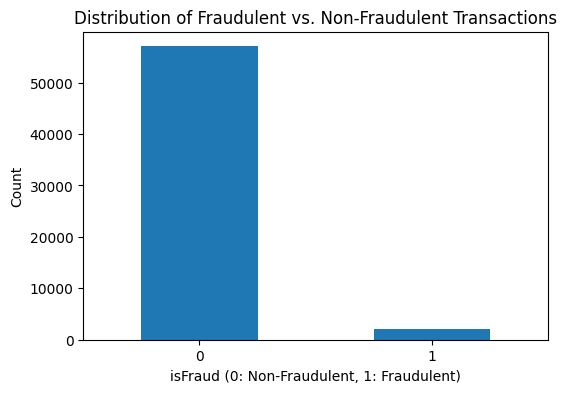

In [17]:
# Visualize the distribution of fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(6, 4))
fruad_data['isFraud'].value_counts().plot(kind='bar')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('isFraud (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Observations:

* The bar plot clearly illustrates a significant class imbalance, with a much larger number of non-fraudulent transactions (represented by 0) compared to fraudulent transactions (represented by 1).
* This imbalance is a critical factor to consider for subsequent modeling steps, as it can lead to biased models that perform poorly in detecting the minority class (fraudulent transactions).

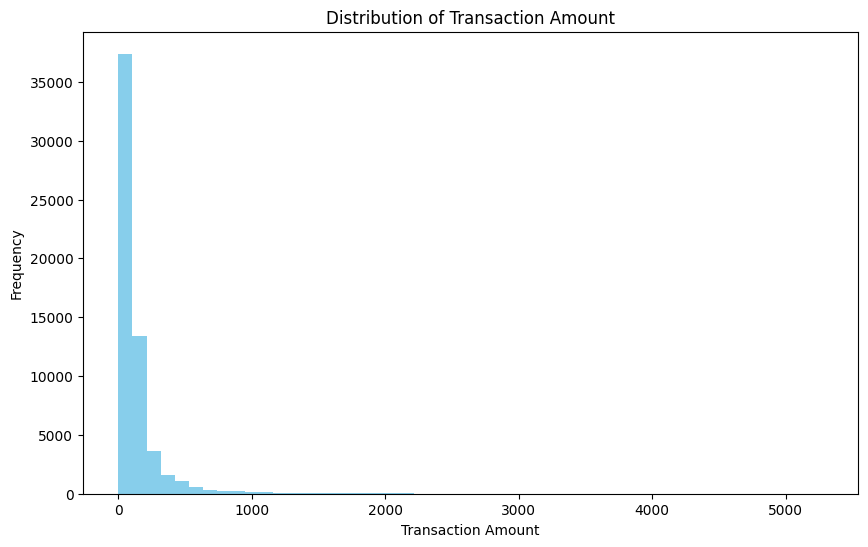

In [18]:
# Visualize the distribution of transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(fruad_data['TransactionAmt'], bins=50, color='skyblue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Observations on Transaction Amount Distribution:

* The majority of transactions are for relatively small amounts, as indicated by the peak in the histogram at lower values.
* The distribution of transaction amounts appears to be heavily skewed to the right, with a long tail of larger transaction amounts. This suggests the presence of outliers, which can be further investigated with a box plot.
* The wide range of transaction amounts highlights the variability in transaction values within the dataset.

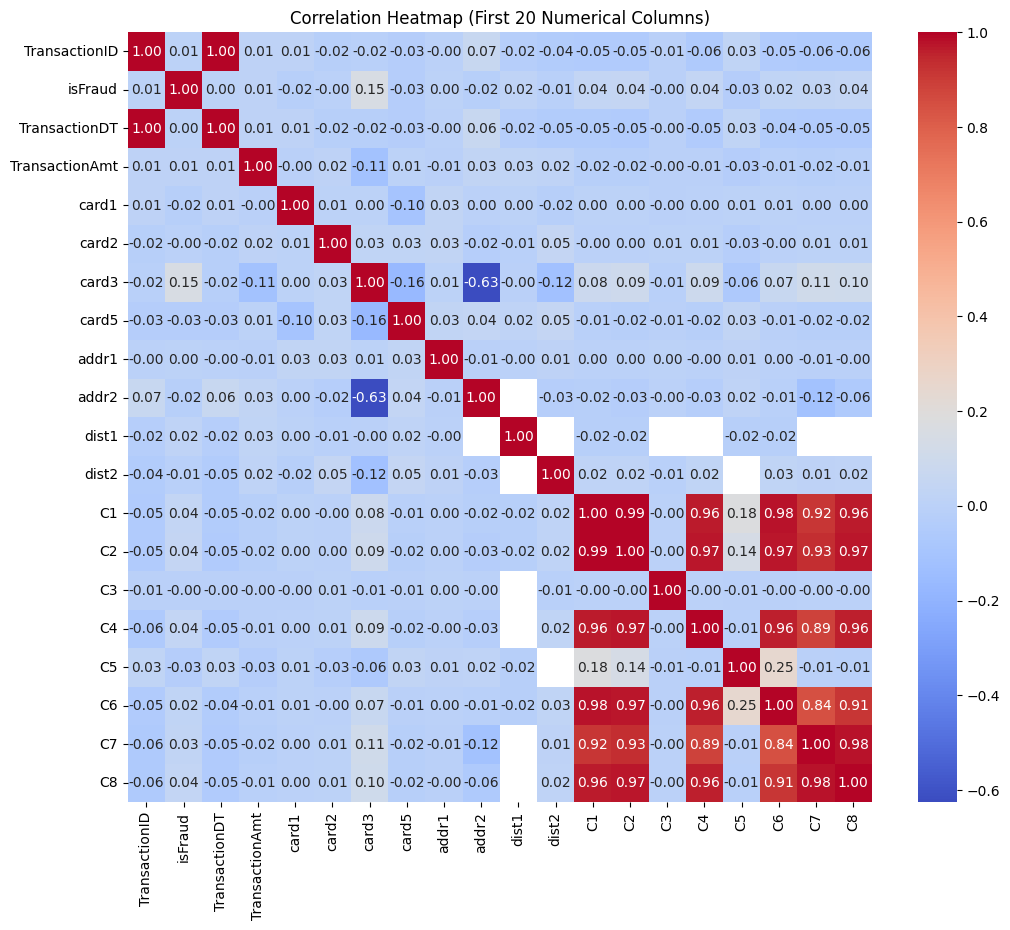

In [20]:
import seaborn as sns

# Select only the numerical columns
numerical_cols = fruad_data.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
corr_matrix = fruad_data[numerical_cols].corr()

# Display the correlation matrix (optional, can be large)
# display(corr_matrix)

# Plot a heatmap of a subset of the correlation matrix (e.g., first 20 numerical columns)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.iloc[:20, :20], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (First 20 Numerical Columns)')
plt.show()

Observations on Correlation Heatmap:

* Observe if there are any strong positive or negative correlations between 'isFraud' and other features. Strong correlations might indicate features that are highly predictive of fraudulent transactions.
* Look for strong correlations among features other than 'isFraud'. High correlations between independent variables (multicollinearity) could be an issue for some models and might require feature selection or dimensionality reduction techniques.
* Note any features that have very low correlations with 'isFraud'. While low correlation doesn't necessarily mean a feature is not important (due to potential non-linear relationships or interactions), it's a good initial indicator to keep in mind.